In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
import pandas as pd
from minisom import MiniSom  
import math
import ipynb
from sklearn.metrics import classification_report
%matplotlib inline

# Import custom functions from seperate workbook
from ipynb.fs.full.helper_functions import *

In [112]:
data = pd.read_csv("/Users/morleypemberton/Documents/UNI/Semester 1 2022/DATA5709 Capstone B/data/animal.csv")
# data normalization
# data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.iloc[0:12,1:12].values

In [96]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5], 
                   sep='\t+', engine='python')

# data normalization
# data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
# data = data.values

In [120]:
data.shape[1]

11

In [121]:
# Initialization and training
som_shape = (3, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.48737945744548156


In [122]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

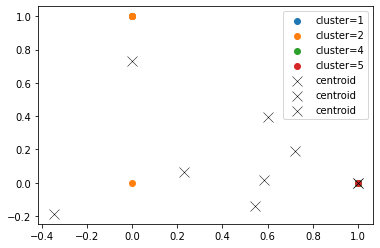

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1],
                label='cluster='+str(c),
                alpha=1)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], 
                centroid[:, 1],
                marker='x', 
                s=100, linewidths=0.5, color='k', label='centroid')
plt.legend();

In [5]:
# Here we have to flatten our data so we are able to feed it to the SOM
x_test_r = flatten_and_reshape(x_test)
x_train_r = flatten_and_reshape(x_train)

In [11]:
som = create_train_som(x_test_r[0:1000], 784)

11
Training...
...ready!


In [12]:
print(classification_report(y_test[0:1000], classify(som, x_test_r[0:1000], x_train_r[0:1000], y_train[0:1000])))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        85
           1       0.73      0.97      0.84       126
           2       0.97      0.51      0.67       116
           3       0.57      0.83      0.68       107
           4       0.65      0.66      0.65       110
           5       0.43      0.38      0.40        87
           6       0.84      0.77      0.80        87
           7       0.54      0.78      0.64        99
           8       0.76      0.25      0.37        89
           9       0.53      0.53      0.53        94

    accuracy                           0.66      1000
   macro avg       0.69      0.65      0.64      1000
weighted avg       0.69      0.66      0.65      1000

